## Observations and Insights 

249 mice identified with SCC tumor growth were treated with a variety of drug regimens. One mouse was excluded from this dataset analysis due to timepoint duplicate error.  Our analysis of Pymaceuticals' drug of interest, Capomulin, compared with other treatment regimens concluded the following observations and insights:

1.  The average tumor volume (mm3) of mice treated with **Capomulin** drug is *lower*, suggesting **greater effectiveness**, in comparison with Infubinol and Ceftamin.  However, it is slightly higher in comparison with Ramicane.  Further, mice treated with Capomulin and Ramicane appear to have *higher* timepoint counts, suggesting that mice lives are prolonged using these two drug treatments. 
<br>
<br>
2.  The tumor volume (mm3) appears to have direct relationship with the mouse weight (g).  This relationship is depicted in the scatter plot, *Average Tumor Volume (mm3) vs. Mouse Weight (g)*.
<br>
<br>
3.  The study data shows a reasonable distribution between mice sex, 49% female and 51% male.  Further, mice are equally distributed among treatments (at 25 each) except for Propriva and Stelasyn (at 24 each).

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Set the data path
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(study_results, mouse_metadata, on = ['Mouse ID'], how = 'outer')

# Display the data merged table for preview
study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Display the source data for preview
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# Checking the number of mice.
study_data['Mouse ID'].nunique()

249

In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = study_data[study_data.duplicated(['Mouse ID','Timepoint'])]
duplicate_id = []
for data in duplicate['Mouse ID']:
    if data not in duplicate_id:
        duplicate_id.append(data)
duplicate_id

['g989']

In [5]:
# Get all the data for the duplicate mouse ID. 
study_data_duplicates = study_data.loc[study_data['Mouse ID'].isin(duplicate_id)]
study_data_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean dataframe by dropping the duplicate mouse by its ID.
study_data_valid_records = study_data.loc[study_data['Mouse ID'].isin(duplicate_id)==False]
study_data_valid_records

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Check the number of mice in the clean dataframe.
valid_id = []
for data in study_data_valid_records['Mouse ID']:
    if data not in valid_id:
        valid_id.append(data)
len(valid_id)

248

## Summary Statistics

In [8]:
# Check the data types
study_data_valid_records.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grouped_regimen = study_data_valid_records.groupby(['Drug Regimen'])

# Mean
tumor_mean = grouped_regimen['Tumor Volume (mm3)'].mean()

# Median
tumor_median = grouped_regimen['Tumor Volume (mm3)'].median()

# Variance
tumor_var = grouped_regimen['Tumor Volume (mm3)'].var()

# Standard deviation
tumor_std = grouped_regimen['Tumor Volume (mm3)'].std()

# Standard error of the mean (sem)
tumor_sem = grouped_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
regimen_statistics = pd.DataFrame({'Mean' : tumor_mean,
                                               'Median' : tumor_median,
                                               'Variance' : tumor_var,
                                               'Standard Deviation' : tumor_std,
                                               'Standard Error of the Mean (SEM)' : tumor_sem})
regimen_statistics

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
study_data_valid_records.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

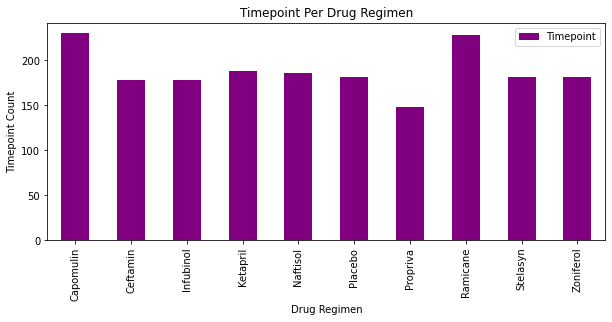

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Create a table of timepoint count with drug regimen as key
drug_timepoint = study_data_valid_records.groupby(['Drug Regimen'])['Timepoint'].count()
drug_timepoint_df = pd.DataFrame({'Timepoint' : drug_timepoint})


# Plot the data using bar chart, add tittle and labels
drug_timepoint_df.plot(kind='bar', color='purple', figsize=(10,4))
plt.title('Timepoint Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint Count')
plt.show()

# Show the table of timepoint count per drug regimen
drug_timepoint_df 

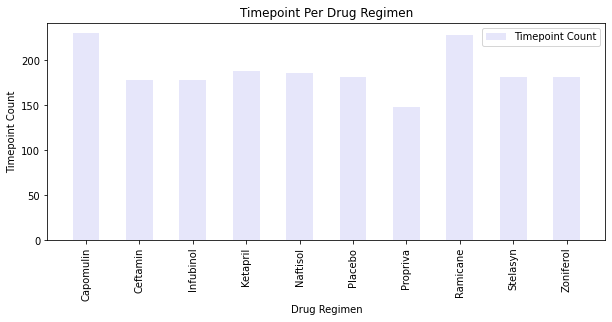

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set values for y-axis
timepoint_count = grouped_regimen['Timepoint'].count()
drug = timepoint_count.keys()

# Set the length of x-axis and use list comprehension to return drug regimen as label 
x_axis = np.arange(len(drug))
tick_locations = [value for value in drug]

# Plot the data using bar chart, add tittle and labels
plt.figure(figsize=(10,4))
plt.bar(drug, timepoint_count, color='lavender', width=0.5, align="center", label = 'Timepoint Count')
plt.legend(loc='upper right')
plt.xticks(drug, rotation='vertical')
plt.title('Timepoint Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint Count')
plt.show()

# Show the table of timepoint count per drug regimen
drug_timepoint_df 

,Count
Sex,
Female,922
Male,958


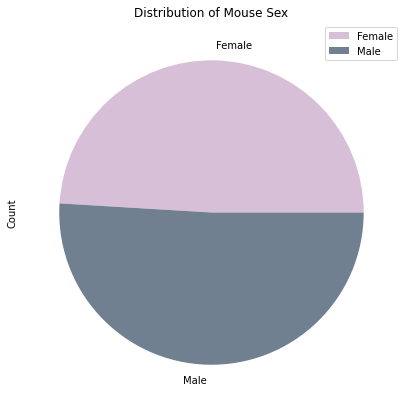

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create a table of gender statistical count
mouse_sex = study_data_valid_records.groupby(['Sex'])
mouse_sex_dist = mouse_sex['Mouse ID'].count()
mouse_sex_df = pd.DataFrame({'Count' : mouse_sex_dist})


# Plot the data using pie chart, add tittle and labels
mouse_sex_df.plot(kind='pie',y='Count', colors = ['thistle', 'slategrey'], figsize=(7,7), 
                    title = 'Distribution of Mouse Sex')

# Show the table of gender statistical count
mouse_sex_df

,Count
Sex,
Female,922
Male,958


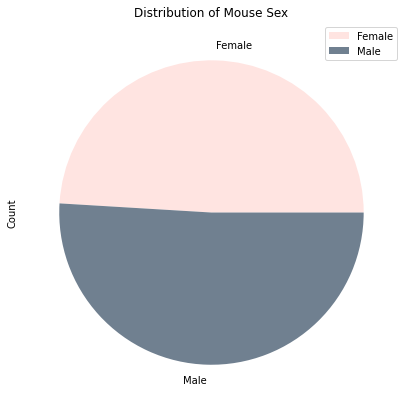

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Plot the data using pie chart, add tittle and labels
mouse_sex_df.plot.pie(y='Count', figsize=(7, 7), colors = ['mistyrose', 'slategrey'])
plt.title('Distribution of Mouse Sex')

# Show the table of gender statistical count
mouse_sex_df

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [16]:
# Check the data types
study_data_valid_records.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [17]:
study_data_valid_records

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [18]:
# Create a new dataframe that contains only the drug data for analysis
data_fa = study_data_valid_records.loc[(study_data_valid_records['Drug Regimen'] == 'Capomulin') |
                                            (study_data_valid_records['Drug Regimen'] == 'Ramicane') |
                                            (study_data_valid_records['Drug Regimen'] == 'Infubinol') |
                                            (study_data_valid_records['Drug Regimen'] == 'Ceftamin'), :]
data_fa.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [19]:
# Group by mouse ID and determine the last time point (maximum timepoint) per mouse ID
mouseid_group = data_fa.groupby('Mouse ID')
last_tp = mouseid_group['Timepoint'].max()
last_tp_df = pd.DataFrame({'Last Timepoint' : last_tp})
last_tp_df.head()

,Last Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45


In [20]:
# Merge this last timepoint group df with the original dataframe to get the tumor volume at the last timepoint
study_data_ltp = pd.merge(data_fa, last_tp_df, on = ['Mouse ID'], how = 'outer')
study_data_ltp.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [21]:
# Create a list that holds the treatment names, as well as a second, empty list to hold the tumor volume data
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Loop through each drug in the treatment list, locating the rows in the merged DF that correspond to each treatment
for treatment in treatments:

    # Create a subset dataframe with records corresponding to the treatment on the treatment list
    treatment_df = study_data_ltp.loc[study_data_ltp["Drug Regimen"] == treatment]

    # Create a subset dataframe with records corresponding to the last timepoint
    tumor_ltp = treatment_df.loc[treatment_df['Timepoint'] == treatment_df['Last Timepoint']]

    # Append the resulting final tumor volume at the last timepoint record into the drug values list
    tumor_fv = tumor_ltp['Tumor Volume (mm3)']
    drug_values.append(tumor_fv)
    
    # Calculate the interquartile range and quantitatively determine if there are any potential outliers.
    quartiles = tumor_fv.quantile([.25,.5,.75])

    # First quartile
    lowerq = quartiles[0.25]

    # Third quartile
    upperq = quartiles[0.75]

    # Interquartile range
    iqr = upperq-lowerq

    print(f'Treatment: {treatment}')
    print(f'The lower quartile of tumor volume (mm3) is: {lowerq}')
    print(f'The upper quartile of tumor volume (mm3) is: {upperq}')
    print(f'The interquartile range of tumor volume (mm3) is: {iqr}')
    print(f'The the median of tumor volume (mm3) is: {quartiles[0.5]}')
   
    # Calculate the lower bound
    lower_bound = lowerq - (1.5*iqr)

    # Calculate the upper bound
    upper_bound = upperq + (1.5*iqr)

    print(f'Values below {lower_bound} could be outliers.')
    print(f'Values above {upper_bound} could be outliers.')
    print('<--------------------->')
    print('                       ')
    

Treatment: Capomulin
The lower quartile of tumor volume (mm3) is: 32.37735684
The upper quartile of tumor volume (mm3) is: 40.1592203
The interquartile range of tumor volume (mm3) is: 7.781863460000004
The the median of tumor volume (mm3) is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
<--------------------->
                       
Treatment: Ramicane
The lower quartile of tumor volume (mm3) is: 31.56046955
The upper quartile of tumor volume (mm3) is: 40.65900627
The interquartile range of tumor volume (mm3) is: 9.098536719999998
The the median of tumor volume (mm3) is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
<--------------------->
                       
Treatment: Infubinol
The lower quartile of tumor volume (mm3) is: 54.04860769
The upper quartile of tumor volume (mm3) is: 65.52574285
The interquartile range of tumor volume (mm3) is: 11.477135160000003
Th

In [22]:
# Segregate the dataframes for each treatment records and assign tumor values in a each treatment variable

# Capomulin
capomulin_df = study_data_valid_records.loc[study_data_valid_records['Drug Regimen'] == 'Capomulin']
capomulin_tv = capomulin_df['Tumor Volume (mm3)']

# Ramicane
ramicane_df = study_data_valid_records.loc[study_data_valid_records['Drug Regimen'] == 'Ramicane']
ramicane_tv = ramicane_df['Tumor Volume (mm3)']

# Infubinol
infubinol_df = study_data_valid_records.loc[study_data_valid_records['Drug Regimen'] == 'Infubinol']
infubinol_tv = infubinol_df['Tumor Volume (mm3)']

# Ceftamin
ceftamin_df = study_data_valid_records.loc[study_data_valid_records['Drug Regimen'] == 'Ceftamin']
ceftamin_tv = ceftamin_df['Tumor Volume (mm3)']

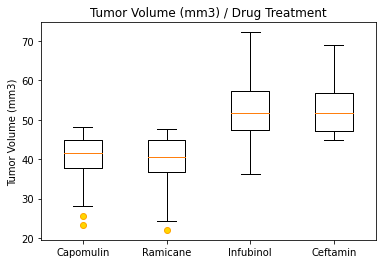

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest and format boxplot style
data = [capomulin_tv, ramicane_tv, infubinol_tv, ceftamin_tv]
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
flierprops = dict(marker='o', markerfacecolor='gold', 
                  linestyle='none', markeredgecolor='orange')
plt.boxplot(data, flierprops=flierprops, labels=labels)
plt.title('Tumor Volume (mm3) / Drug Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [24]:
# Show sample mouse ID treated with Capomulin (used to select a sample mouse ID)
capomulin_group = capomulin_df.groupby(['Mouse ID'])
capomulin_max = capomulin_group['Tumor Volume (mm3)'].max()
capomulin_max 

Mouse ID
b128    45.651331
b742    45.000000
f966    45.000000
g288    46.304003
g316    46.809225
i557    47.685963
i738    45.595685
j119    48.158209
j246    46.408361
l509    48.070452
l897    46.154737
m601    45.000000
m957    46.414518
r157    46.539206
r554    45.781746
r944    47.373423
s185    45.000000
s710    45.000000
t565    46.749006
u364    47.212200
v923    45.704434
w150    45.000000
w914    45.893720
x401    45.473753
y793    45.000000
Name: Tumor Volume (mm3), dtype: float64

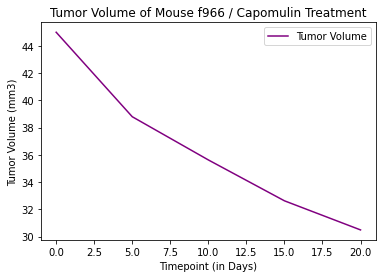

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
sample_mouse = 'f966'
mouse_lp = capomulin_df.loc[capomulin_df['Mouse ID'] == sample_mouse]
plt.plot(mouse_lp['Timepoint'], mouse_lp['Tumor Volume (mm3)'], label = 'Tumor Volume', color ='purple')
plt.legend(loc='upper right')
plt.title(f'Tumor Volume of Mouse {sample_mouse} / Capomulin Treatment')
plt.xlabel('Timepoint (in Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


In [26]:
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


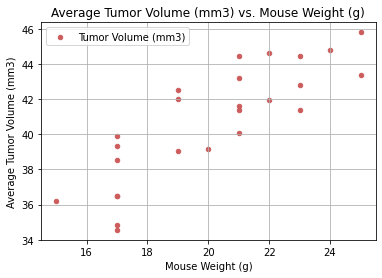

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_gp = capomulin_df.groupby('Mouse ID')
ave_tv = capomulin_gp['Tumor Volume (mm3)'].mean()
size = capomulin_gp['Weight (g)'].max()

# Create a new dataframe that contains only the average tumor volume and mouse size by mouse
capomulin_sp = pd.DataFrame({'Average Tumor Volume (mm3)' : ave_tv,'Mouse Weight (g)' : size})
capomulin_sp.plot(kind='scatter', x='Mouse Weight (g)', y='Average Tumor Volume (mm3)',
                  grid=True, color ='indianred', label='Tumor Volume (mm3)',
                  title = 'Average Tumor Volume (mm3) vs. Mouse Weight (g)')
plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
y_values = capomulin_sp['Average Tumor Volume (mm3)']
x_values = capomulin_sp['Mouse Weight (g)']
print(f'The correlation coefficient between mouse weight and average tumor volume for Capomulin is {round(st.pearsonr(x_values,y_values)[0],2)}.')

The correlation coefficient between mouse weight and average tumor volume for Capomulin is 0.84.


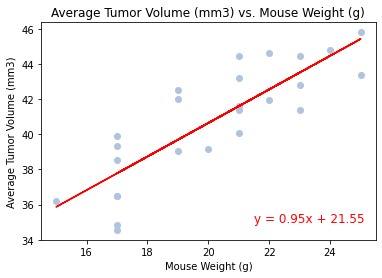

In [29]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Calculate linear regression
y_values = capomulin_sp['Average Tumor Volume (mm3)']
x_values = capomulin_sp['Mouse Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression in a scotter plot with labels and annotation
plt.scatter(x_values,y_values, color ='lightsteelblue',label='Tumor Volume (mm3)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21.5,35),fontsize=12,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs. Mouse Weight (g)')
plt.show()